# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [4]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_FileByGoogle_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-08-03 05:25:24,agar dpt menyimpannya
1,Pengguna Google,5,2024-08-03 03:55:00,Jempol
2,Pengguna Google,1,2024-08-03 03:43:48,sangat mengganggu tidak bisa membuka file data...
3,Pengguna Google,5,2024-08-03 02:28:01,Sangat membantu...
4,Pengguna Google,5,2024-08-03 01:00:20,Mantap


In [5]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,agar dpt menyimpannya
1,Jempol
2,sangat mengganggu tidak bisa membuka file data...
3,Sangat membantu...
4,Mantap
...,...
2495,Terimakasih.
2496,Iya begitu lah
2497,"Sangat membantu buat punya hp yg lemot, mengir..."
2498,Sangat membantu membersihkan file/video/status...


In [6]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2500 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [7]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2500
unique,1623
top,Ok
freq,161


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [8]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2500, 1)

In [9]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [10]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [11]:
# Menghapus data yang kosong

df = df.dropna()

In [12]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [13]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1623, 1)

In [14]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [15]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [16]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(lambda x: clean_review_text(remove_emojis(x))).str.lower()
df

,content,cleaning
0,agar dpt menyimpannya,agar dpt menyimpannya
1,Jempol,jempol
2,sangat mengganggu tidak bisa membuka file data...,sangat mengganggu tidak bisa membuka file data...
3,Sangat membantu...,sangat membantu
4,Mantap,mantap
...,...,...
2494,😽💀💕🇺🇲🇺🇲🇺🇲🇺🇲🇺🇲🇻🇮🇸🇿🇹🇯🇸🇨🚑🚂🚂🚑🛵🚒🛶🚒🚒🚑🚂🚒🚒🚃🏎️🛴🛴🚜🚄🚅🚔🇹🇨🇺...,
2495,Terimakasih.,terimakasih
2496,Iya begitu lah,iya begitu lah
2497,"Sangat membantu buat punya hp yg lemot, mengir...",sangat membantu buat punya hp yg lemot mengiri...


# **Normalization**

In [17]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
        "ampunsaya" : "ampun saya",
        "mantapz" : "mantap",
        "dgan lyanananya" : "dengan layanannya",
        "sbn" : "saham",
        "maw" : "mau",
        "ajh" : "aja",
        "ingglish" : "ingrris",
        "ratinh" : "rating",
        "bnaget" : "banget",
        "m a" : "",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,agar dpt menyimpannya,agar dpt menyimpannya,agar dpt menyimpannya
1,Jempol,jempol,jempol
2,sangat mengganggu tidak bisa membuka file data...,sangat mengganggu tidak bisa membuka file data...,sangat mengganggu tidak bisa membuka file data...
3,Sangat membantu...,sangat membantu,sangat membantu
4,Mantap,mantap,mantap
...,...,...,...
2494,😽💀💕🇺🇲🇺🇲🇺🇲🇺🇲🇺🇲🇻🇮🇸🇿🇹🇯🇸🇨🚑🚂🚂🚑🛵🚒🛶🚒🚒🚑🚂🚒🚒🚃🏎️🛴🛴🚜🚄🚅🚔🇹🇨🇺...,,
2495,Terimakasih.,terimakasih,terimakasih
2496,Iya begitu lah,iya begitu lah,iya begitu lah
2497,"Sangat membantu buat punya hp yg lemot, mengir...",sangat membantu buat punya hp yg lemot mengiri...,sangat membantu buat punya hp yang lemot mengi...


# **Stopwords**

In [18]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.6 MB/s eta 0:00:00


In [19]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu", "bisa",
                   "gak", "buat", "ke", "ga", "suka", "karena", "banget", "hal", "dalam", "amat"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,agar dpt menyimpannya,agar dpt menyimpannya,agar dpt menyimpannya,agar dpt menyimpannya
1,Jempol,jempol,jempol,jempol
2,sangat mengganggu tidak bisa membuka file data...,sangat mengganggu tidak bisa membuka file data...,sangat mengganggu tidak bisa membuka file data...,mengganggu bisa membuka file data tolol
3,Sangat membantu...,sangat membantu,sangat membantu,membantu
4,Mantap,mantap,mantap,mantap
...,...,...,...,...
2494,😽💀💕🇺🇲🇺🇲🇺🇲🇺🇲🇺🇲🇻🇮🇸🇿🇹🇯🇸🇨🚑🚂🚂🚑🛵🚒🛶🚒🚒🚑🚂🚒🚒🚃🏎️🛴🛴🚜🚄🚅🚔🇹🇨🇺...,,,
2495,Terimakasih.,terimakasih,terimakasih,terimakasih
2496,Iya begitu lah,iya begitu lah,iya begitu lah,iya begitu
2497,"Sangat membantu buat punya hp yg lemot, mengir...",sangat membantu buat punya hp yg lemot mengiri...,sangat membantu buat punya hp yang lemot mengi...,membantu punya hp lemot mengiritau memindahkan...


# **Tokenize**

In [20]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,agar dpt menyimpannya,agar dpt menyimpannya,agar dpt menyimpannya,agar dpt menyimpannya,"[agar, dpt, menyimpannya]"
1,Jempol,jempol,jempol,jempol,[jempol]
2,sangat mengganggu tidak bisa membuka file data...,sangat mengganggu tidak bisa membuka file data...,sangat mengganggu tidak bisa membuka file data...,mengganggu bisa membuka file data tolol,"[mengganggu, bisa, membuka, file, data, tolol]"
3,Sangat membantu...,sangat membantu,sangat membantu,membantu,[membantu]
4,Mantap,mantap,mantap,mantap,[mantap]
...,...,...,...,...,...
2494,😽💀💕🇺🇲🇺🇲🇺🇲🇺🇲🇺🇲🇻🇮🇸🇿🇹🇯🇸🇨🚑🚂🚂🚑🛵🚒🛶🚒🚒🚑🚂🚒🚒🚃🏎️🛴🛴🚜🚄🚅🚔🇹🇨🇺...,,,,[]
2495,Terimakasih.,terimakasih,terimakasih,terimakasih,[terimakasih]
2496,Iya begitu lah,iya begitu lah,iya begitu lah,iya begitu,"[iya, begitu]"
2497,"Sangat membantu buat punya hp yg lemot, mengir...",sangat membantu buat punya hp yg lemot mengiri...,sangat membantu buat punya hp yang lemot mengi...,membantu punya hp lemot mengiritau memindahkan...,"[membantu, punya, hp, lemot, mengiritau, memin..."


# **Stemming**

In [21]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_FileByGoogle_1.csv', index = False)


In [22]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_FileByGoogle_1.csv', encoding = 'latin1')
df_steamming


,steamming
0,agar dpt simpan
1,jempol
2,ganggu bisa buka file data tolol
3,bantu
4,mantap
...,...
1618,NaN
1619,terimakasih
1620,iya begitu
1621,bantu punya hp lot mengiritau pindah file ters...


# **Translate**

In [23]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadat

In [24]:
import pandas as pd
from easynmt import EasyNMT

In [25]:
# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_FileByGoogle_1.csv', encoding = 'latin1')


In [26]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [27]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 2.07MB/s]                   


In [28]:
# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')
df_values

<ipython-input-28-393f53f3cc1a>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values = df_steamming.fillna(method = 'pad')


,steamming
0,agar dpt simpan
1,jempol
2,ganggu bisa buka file data tolol
3,bantu
4,mantap
...,...
1618,keten
1619,terimakasih
1620,iya begitu
1621,bantu punya hp lot mengiritau pindah file ters...


In [29]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FileByGoogle_1.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [30]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FileByGoogle_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,agar dpt simpan,to be able to save
1,jempol,thumb
2,ganggu bisa buka file data tolol,Interrupt can open stupid data file
3,bantu,Help.
4,mantap,Steady.
...,...,...
1618,keten,keten
1619,terimakasih,Thank you.
1620,iya begitu,That's it.
1621,bantu punya hp lot mengiritau pindah file ters...,Help own the phone. lot told me to move a hidd...


# **Labeling**

In [31]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FileByGoogle_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,agar dpt simpan,to be able to save
1,jempol,thumb
2,ganggu bisa buka file data tolol,Interrupt can open stupid data file
3,bantu,Help.
4,mantap,Steady.
...,...,...
1618,keten,keten
1619,terimakasih,Thank you.
1620,iya begitu,That's it.
1621,bantu punya hp lot mengiritau pindah file ters...,Help own the phone. lot told me to move a hidd...


In [32]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [33]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [34]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 728
Netral = 752
Negatif = 143

Total Data Seluruhnya : 1623


In [35]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,agar dpt simpan,to be able to save,Positif
1,jempol,thumb,Netral
2,ganggu bisa buka file data tolol,Interrupt can open stupid data file,Negatif
3,bantu,Help.,Netral
4,mantap,Steady.,Positif
...,...,...,...
1618,keten,keten,Netral
1619,terimakasih,Thank you.,Netral
1620,iya begitu,That's it.,Netral
1621,bantu punya hp lot mengiritau pindah file ters...,Help own the phone. lot told me to move a hidd...,Positif


In [36]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



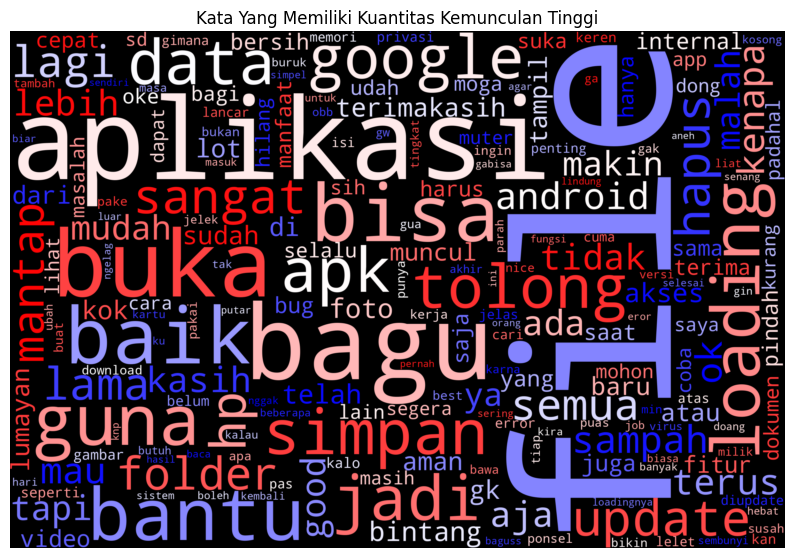

In [37]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

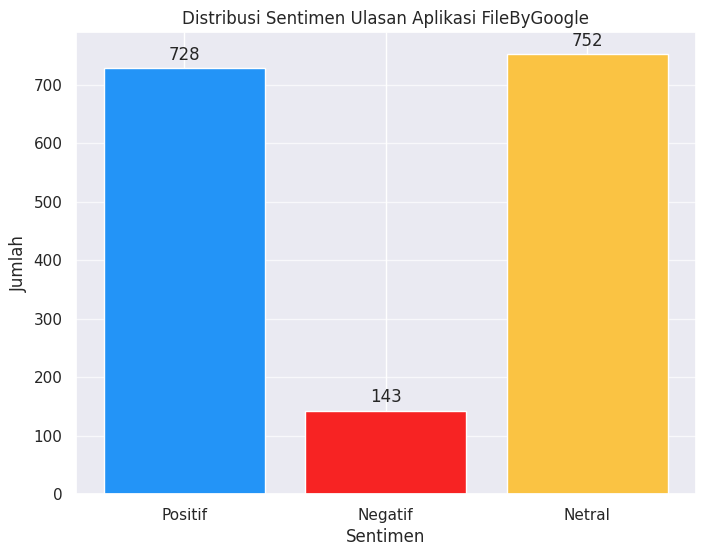

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FileByGoogle")

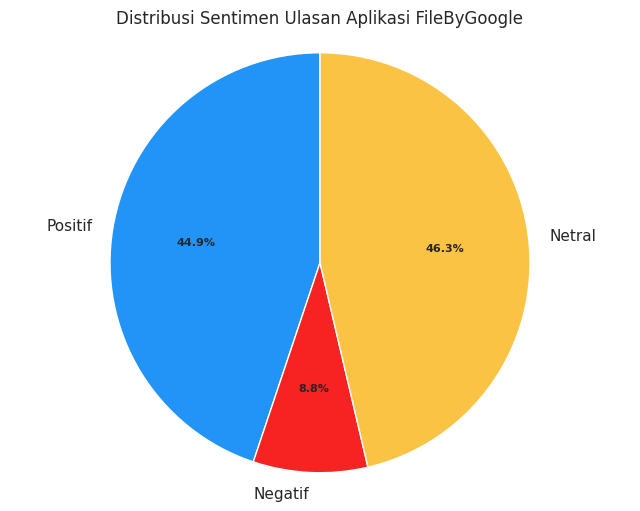

In [39]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FileByGoogle")

In [40]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,agar dpt simpan,to be able to save,Positif
2,ganggu bisa buka file data tolol,Interrupt can open stupid data file,Negatif
4,mantap,Steady.,Positif
5,ok,Okay.,Positif
7,bagus,Good.,Positif
...,...,...,...
1613,update kan,update right,Positif
1614,oke topp,okay topp,Positif
1615,aplikasi buruk bisa buka folder androiddata ti...,bad application can open androiddata folders n...,Negatif
1621,bantu punya hp lot mengiritau pindah file ters...,Help own the phone. lot told me to move a hidd...,Positif


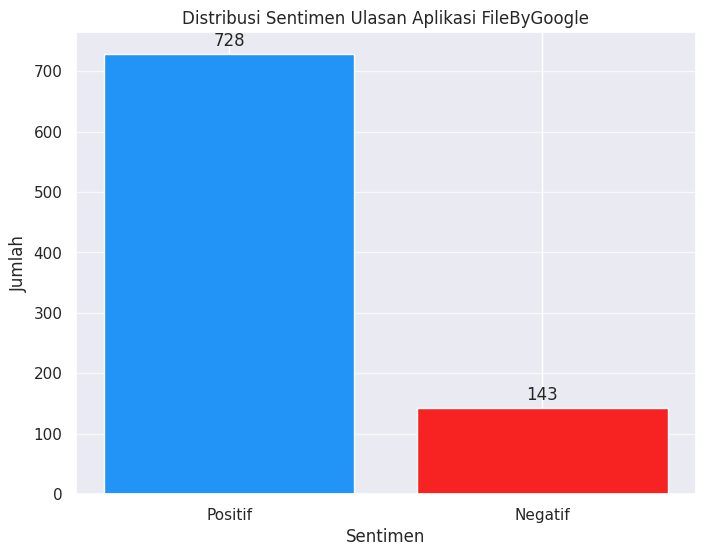

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FileByGoogle")

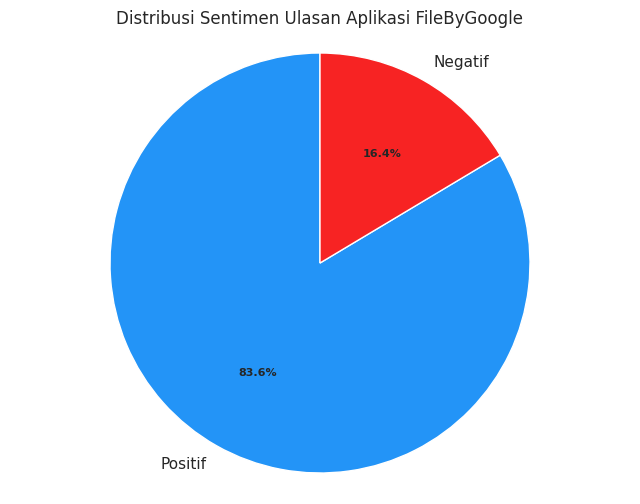

In [42]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FileByGoogle")

In [43]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,agar dpt simpan,to be able to save,0
2,ganggu bisa buka file data tolol,Interrupt can open stupid data file,1
4,mantap,Steady.,0
5,ok,Okay.,0
7,bagus,Good.,0
...,...,...,...
1613,update kan,update right,0
1614,oke topp,okay topp,0
1615,aplikasi buruk bisa buka folder androiddata ti...,bad application can open androiddata folders n...,1
1621,bantu punya hp lot mengiritau pindah file ters...,Help own the phone. lot told me to move a hidd...,0


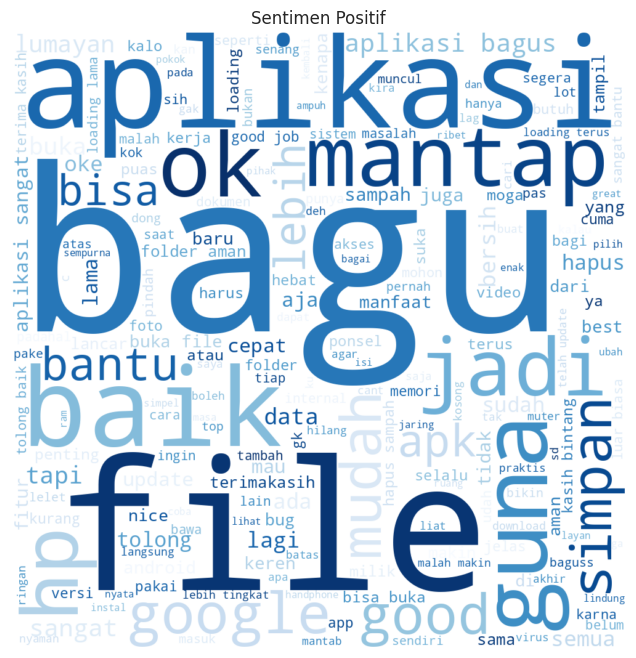

In [44]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

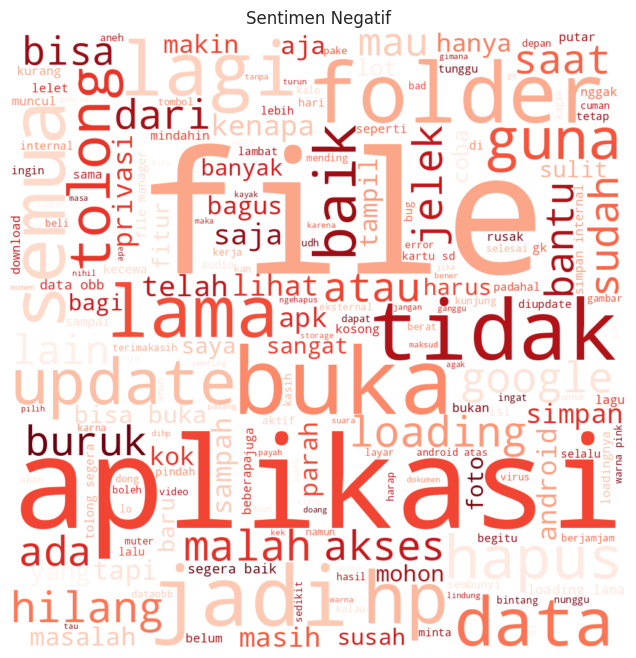

In [45]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

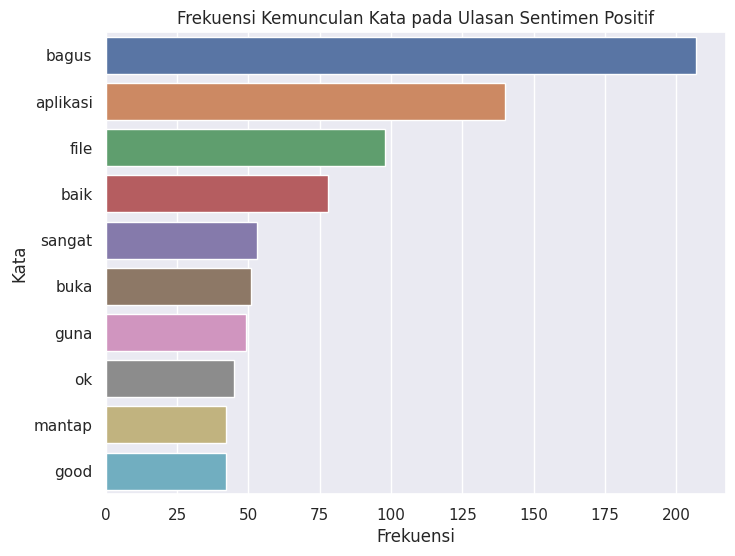

In [46]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [47]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        207
aplikasi        140
    file         98
    baik         78
  sangat         53
    buka         51
    guna         49
      ok         45
  mantap         42
    good         42


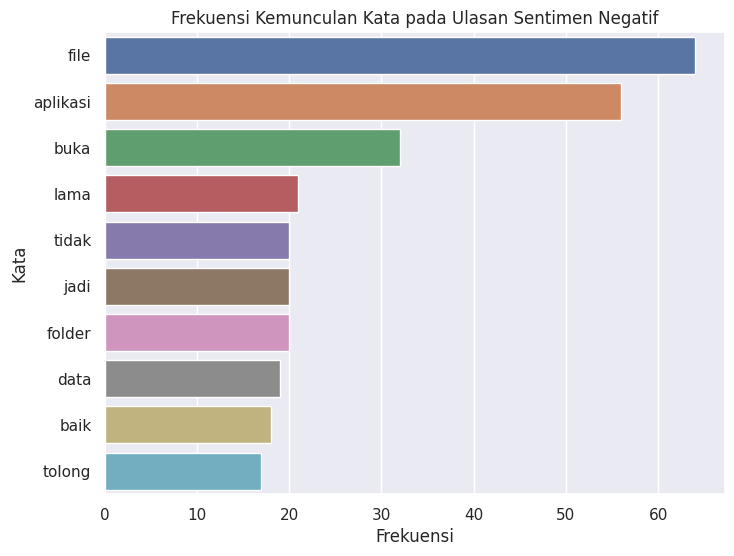

In [48]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [49]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
    file         64
aplikasi         56
    buka         32
    lama         21
   tidak         20
    jadi         20
  folder         20
    data         19
    baik         18
  tolong         17


In [50]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,728
1,143


# **Transormation & Data Preparation**

In [51]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [52]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [53]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

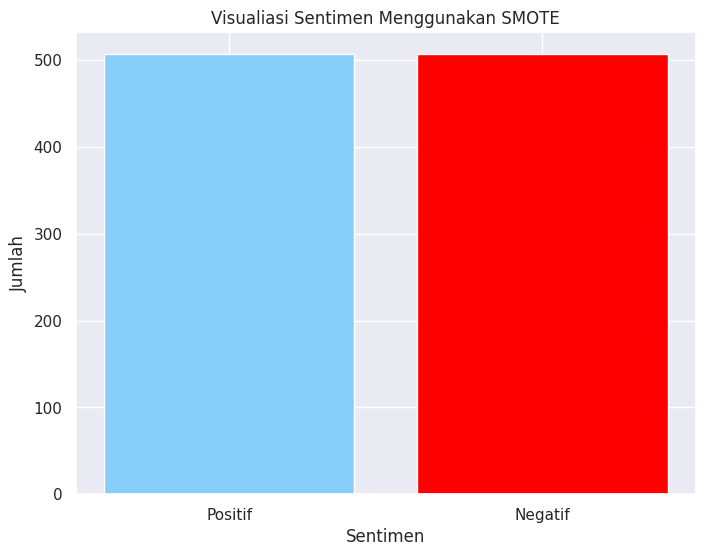

In [54]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [55]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [57]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [58]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8091603053435115

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.97      0.80      0.88       221
     Negatif       0.44      0.85      0.58        41

    accuracy                           0.81       262
   macro avg       0.71      0.83      0.73       262
weighted avg       0.89      0.81      0.83       262



In [59]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[177  44]
 [  6  35]]

True Positives (TP) =  177

True Negatives (TN) =  35

False Positives (FP) =  44

False Negatives (FN) =  6

Accuracy =  0.8091603053435115


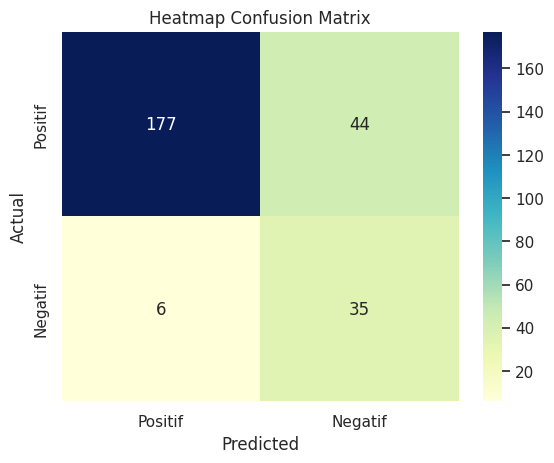

In [60]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [61]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [62]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8092


In [63]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1908


# **Testing**

In [64]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Secara keseluruhan udah bagus, tampilan simpel dan proses pindah, salin, ekstrak, dll. lumayan cepet juga ada fitur fitur yang bermanfaat. Saran untuk fitur “Folder Aman” agar lebih ditingkatkan lagi keamanannya, biar kita tenang kalo mau nyimpen dokumen dokumen penting.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 81.41%
Probabilitas: 81.4059420221205 %


In [65]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Apasih ni aplikasi abis update bukannya jadi lebih baik malah lelet lemot gini, buka bagian penyimpanan internal cuma loading muter-muter gak jelas terus mau buka foto, video, dokumen, sama aplikasi juga cuma loading muter-muter gak jelas abis update malah makin jelek aja mending versi lama aplikasinya gak ribet gak lelet mau buka atau hapus file cepet gak pake lama langsung selesai. ABIS UPDATE MALAH MAKIN PARAH APLIKASINYA!!!!!. LELET, LEMOT, BANYAK BUG, CUMA LOADING MUTER-MUTER GAK JELAS.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 87.91%
Probabilitas: 87.91322245801364 %


In [66]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Aplikasi yg sangat bagus bisa menampilkan semua aplikasi,bahkan yg tidak muncul di layar sekalipun.Saya berhasil menghapus aplikasi yg mengirimkan iklan terus menerus.Thanks to file by google
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 50.32%
Probabilitas: 50.3210972048128 %
